1. Bayes Classifier (Gaussian with MLE Estimate)
2. Naive Bayes Classifier (Gaussian, Binomial and GMM with MLE Estimate)
3. K-means Clustering
4. K-Nearest Neighbor Classifier
5. Principal component analysis 


 ## Bayes Methods Implemented :

1. MLE - Done with Gaussian 
2. Expectation Maximization with GMM 
 
## Densities implemented :
1. GMM
2. Gaussian
3. Binomial 

In [10]:
import json
import random
import time
import math
from ast import literal_eval as make_tuple
import numpy as np
import pandas as pd
import psutil
from utils import mnist_reader
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [54]:
class multivariate_normal:
    def __init__(self,mean,cov):
        self.mean=mean
        self.cov=cov
    def pdf(self,x):
        return  (1/(np.power(2* np.pi,self.mean.shape[0]/2)*np.power(np.linalg.det(self.cov),0.5))) *np.exp (-0.5 * (np.linalg.multi_dot([(x - self.mean) , (np.linalg.inv(self.cov)), (x - self.mean).T])))
    

In [55]:
def univariate_normal(x,mean,var):
    return  (1/(np.power(2* np.pi*var,0.5))) * np.exp(-0.5 * np.array((x- mean)**2/var,dtype='float'))
def distance(a, b):
    return np.linalg.norm(a-b)

In [56]:
def binomial(test,prob,m):
    return [np.power(prob,x)*np.power(prob,(m-x))*comb(m,x) for x in test]
def comb(n,r):
    f=math.factorial
    return f(n)//f(r)//f(n-r)

In [39]:
#Bayes Gaussian with MLE Estimate    
class GaussianBayes:         
    def predict(self,test):
        prob_vect = np.zeros((self.n_classes,test.shape[0]))
        for i in range(self.n_classes):        
            class_cond = multivariate_normal(self.mean[i,:],self.cov[i,:])
            prior=self.prior[i]         
            for j in range(test.shape[0]):
                prob_vect[i,j] = prior*class_cond.pdf(test[j])       
        return np.argmax(prob_vect,axis=0), prob_vect.T
    def fit(self, train,y):
        self.mean = []
        self.cov = []
        self.n_classes = np.max(y)+1
        self.prior = np.zeros(self.n_classes) 
        for i in range(self.n_classes):
            tr_c  = train[y==i]
            self.prior[i]=tr_c.shape[0]/train.shape[0]
            mean_c = np.mean(tr_c, axis=0)
            cov_c=np.cov(tr_c.T.astype(float))
            self.mean.append(mean_c)
            self.cov.append(cov_c)
        self.mean = np.asarray(self.mean)
        self.cov = np.asarray(self.cov)        

In [83]:
#Naive Bayes Implementation of GMM with EM Algorithm
class GMM():
    def __init__(self,mode):
        mean=np.zeros(mode)
        var=np.zeros(mode)
        ltv = np.identity(ltv)
       
        params={'mean':mean,'var':var,'ltv':ltv}
        self.mode=mode

        self.params=params
        
    def fit(self, train,y,iter_n=1000,*args):
        iterations=0
        w=np.random.randn((self.mode,train.shape[0]))
        self.w=w
        while (iterations<iter_n):
            # E-step 
            w_old = w_new
            self.computew(train)
            # new params mean, variance and latent variables
            # M-step 
            self.updateparams(train)   
            iterations+=1
            
    
    def computew(self,train):
        for i in range(self.k):
            self.w[k,:]=self.pdf(train,self.params['mean'][k],self.params['var'][k],self.params['ltv'][k])
        self.w=self.w/np.sum(self.w,axis=0)
    
    def updateparams(self,train):
        p = np.mean(self.w,axis = 0)
        for i in range(k):
            self.params['mean'][i]=np.dot(train, self.w[i])/(p[i])
            self.params['var'][i]=np.dot(self.w[i],(train-self.params['mean'][i])^2)/p[i]
        self.params['ltv']=np.mean(self.w,axis=0)
        
    def pdf(self,test,mean,var,w):
        sum1=0
        for i in range(self.mode):
            sum1+=w[k]*(1/(np.power(2* np.pi*var[k],0.5))) * np.exp(-0.5 * np.array((x- mean[k])**2/var,dtype='float'))  
        return sum1
    def pdf2(self,test,mean,var,w):
           
        return  w*(1/(np.power(2* np.pi*var,0.5))) * np.exp(-0.5 * np.array((x- mean)**2/var,dtype='float')) 

In [84]:
class GMMNB:       
    def predict(self,test):
        prob_vect = np.zeros((self.n_classes,test.shape[0]))
        for i in range(self.n_classes):
            class_cond=1
            for j in range(self.n_features):
                class_cond = class_cond*GMM.pdf(test[:,j],self.mean[i,j], self.var[i,j])
            prior=self.prior[i]         
            prob_vect[i,:] = prior*class_cond
        print(np.argmax(prob_vect,axis=0).shape)
        return np.argmax(prob_vect,axis=0), prob_vect.T
        
    def fit(self, train,y,k):
        self.n_classes = np.max(y)+1
        self.prior = np.zeros(self.n_classes) 
        self.n_features=train.shape[1]
        self.mean = np.zeros((self.n_classes,self.n_features,k))
        self.var = np.zeros((self.n_classes,self.n_features,k))
        for i in range(self.n_classes):
            tr_c  = train[y==i]
            self.prior[i]=tr_c.shape[0]/train.shape[0]
            for j in range(self.n_features):
                gmm=GMM(k)
                self.mean[i,j,:], self.var[i,j,:],self.weights[i,j,:]=gmm.fit(tr_c[:,j],y[(y==j)])
    

In [53]:
# Naive Bayes of Binomial 
class BinomialNB:
    def __init__(self,n_features):
        self.n_features=n_features
    def predict(self,test):
        prob_vect = np.zeros((self.n_classes,test.shape[0]))
        
        for i in range(self.n_classes):
            class_cond=np.ones(test.shape[0])
            for j in range(1,self.n_features):
#                 pdb.set_trace()
                class_cond = np.dot(class_cond,np.array(binomial(test[:,j],self.prob[i,j],self.m[j])))
                prior=self.prior[i]         
            prob_vect[i,:] = prior*class_cond       
        return np.argmax(prob_vect,axis=0), prob_vect.T
        
    def fit(self, train,y):
        self.n_classes = np.max(y)+1
        self.m=np.max(train,axis=0)
        self.prior = np.zeros(self.n_classes) 
        self.prob=np.zeros((self.n_classes,self.n_features))
        for i in range(self.n_classes):
            tr_c  = train[y==i]
            self.prior[i]=tr_c.shape[0]/train.shape[0]
            for j in range(self.n_features):
                self.prob[i,j]=np.mean(tr_c[:,j])/self.m[j]
        print(self.prob)
        

In [41]:
# Naive Bayes of Gaussian 
class GaussianNB():
    def predict(self,test):
        prob_vect = np.zeros((self.n_classes,test.shape[0]))
        for i in range(self.n_classes):
            class_cond=1
            for j in range(self.n_features):
                class_cond = class_cond*univariate_normal(test[:,j],self.mean[i,j], self.var[i,j])
            prior=self.prior[i]         
            prob_vect[i,:] = prior*class_cond
#         print(np.argmax(prob_vect,axis=0).shape)
        return np.argmax(prob_vect,axis=0), prob_vect.T
        
    def fit(self, train,y):
        self.n_classes = np.max(y)+1
        self.prior = np.zeros(self.n_classes) 
        self.n_features=train.shape[1]
        self.mean = np.zeros((self.n_classes,self.n_features))
        self.var = np.zeros((self.n_classes,self.n_features))
        for i in range(self.n_classes):
            tr_c  = train[y==i]
            self.prior[i]=tr_c.shape[0]/train.shape[0]
            for j in range(self.n_features):
                self.mean[i,j]= np.mean(tr_c[:,j])
                self.var[i,j]=np.var(tr_c[:,j])
        self.mean = np.asarray(self.mean)
        self.var = np.asarray(self.var)     

In [42]:
class PCA:
    def __init__(self,n_components,*args):
        self.n=n_components
    def fit_transform(self,X):
        return self.fit(X)
    def fit(self,copy):
        X=copy
        self.mean = np.mean(X, axis=0)
        X = X-self.mean
        C=np.cov(X.T)
#         pdb.set_trace()
        U, V=np.linalg.eig(C)
        self.components=V
        return np.dot(X,V)[:,:self.n]
   
    def transform(self,test):
        output = np.dot(test-self.mean, self.components)
        return output[:,:self.n]
   
        

In [43]:
class KNN:
    def __init__(self,k,*args):
        self.k=k
    def fit(self,train,y):
        self.train=train
        self.y=y
    def predict_one(self,test):
        distances=np.sum((self.train-test)**2,axis=1)
        sorts = distances.argsort()
        targets = np.zeros(self.k)
        for i in range(self.k):
            idx = sorts[i]
            targets[i]=(self.y[idx])
        targets=np.array(targets,dtype='int')
        return np.bincount(targets)
        
    def predict(self,test):
        preds = []
        probabs=[]
        for i in range(test.shape[0]):
            preds.append(np.argmax(self.predict_one(test[i,:])))
            probabs.append(self.predict_one(test[i,:])/np.sum(self.predict_one(test[i,:])))
        return preds, probabs

In [44]:
class KMeans:
    
    def __init__(self,k):
        self.k=k
        
    def fit_predict(self,train,epsilon=0.001,*args):
        self.num_features = train.shape[1]
        history=[]
        self.centers=train[np.random.randint(0,train.shape[0]-1,self.k),:]
        print(self.centers.shape)
        preds = np.zeros(train.shape[0])
        norm = distance(self.centers,0)
        dist_vec=np.zeros(self.k)
#         pdb.set_trace()
#         print(norm)
        iteration = 0
        while (norm > epsilon and iteration<500):
            iteration += 1
            for i in range(train.shape[0]):
                for j in range(self.k):
                    dist_vec[j] = np.sum((train[i,:]-self.centers[j])**2)
                preds[i] = np.argmin(dist_vec)
#                 print(dist_vec.shape)
                probabs[i,:]=dist_vec
            norm=0   
            for i in range(self.k):
                 if(train[preds==i,:].shape[0]):
                    self.centers[i]=np.mean(train[preds==i,:])
                    norm += np.sum((train[preds==i,:]-self.centers[i])**2)   
#             print(self.centers)
#             print(norm)
            history.append(self.centers)
            iteration+=1
#         print(norm)
        return preds

    def predict(self,test):
        preds = np.zeros(test.shape[0])
        probabs=np.zeros((test.shape[0],self.k))
        dist_vec=np.zeros(self.k)
        for i in range(test.shape[0]):
                for j in range(self.k):
                    dist_vec[j] = np.sum((test[i,:]-self.centers[j])**2)
                preds[i] = np.argmin(dist_vec)
                probabs[i,:]=dist_vec
        return preds, probabs
        

In [6]:
class Parzen:
    def __init__(self, window_size=1.):
        self.window_size = window_size

    def fit(self,train,y,*args):
            self.train=train
            self.y=y  

    def predict(self,test):
        n_classes = np.unique(self.y)
        preds = np.zeros(test.shape[0])
        probabs=np.zeros((test.shape[0], n_classes))
        for i in range(test.shape[0]):
            probabs[i,:]=self.get_prob(test[i])
            preds[i]=np.argmax(self.get_prob(test[i]),axis=1)
        return preds, probabs


    def get_prob(self,test):
        probs=np.zeros(np.unique(self.y))
        n_classes = np.unique(y)
        for i in range(n_classes):
            probs[i]=np.mean(univariate_normal(test,self.train[self.y==i],self.window_size))
        return probs



In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from scipy import interp
class metrics:
    def accuracy(self,y,preds):
        return np.sum(y==preds)/y.shape[0]
    
    def scores(self,y_true,y_pred):
        tp =(y_true == y_pred)
        tp_sum=np.bincount(y_true[tp].astype(int))
        pred_sum=np.bincount(y_pred.astype(int))
        true_sum=np.bincount(y_true.astype(int))
        precision = tp_sum/pred_sum
        recall = tp_sum/true_sum
        f_score = ((2) * precision * recall /
                   (precision + recall))
        precision = np.average(precision)
        recall = np.average(recall)
        f_score = np.average(f_score)

        return precision, recall, f_score
    
    def binary_roc_curve(self,y,probs,*args,**kwargs):
        y = (y == 1)

        desc_score_indices = np.argsort(probs)[::-1]
        probs = probs[desc_score_indices]
        y = y[desc_score_indices]
        distinct_value_indices = np.where(np.diff(probs))[0]
        threshold_idxs = np.r_[distinct_value_indices, y.size - 1]

        tps = y[threshold_idxs]
        fps = 1 + threshold_idxs - tps
        thresholds=y[threshold_idxs]
        optimal_idxs = np.where(np.r_[True,np.logical_or(np.diff(fps, 2),np.diff(tps, 2)),True])[0]
        fps = fps[optimal_idxs]
        tps = tps[optimal_idxs]
        thresholds = thresholds[optimal_idxs]
        print(fps,tps)
        fpr = fps / fps[-1]
        tpr = tps / tps[-1]

        return fpr, tpr, thresholds    
        
    def multiclass_roc_curve(self,y,y_score,ax,label,*args,**kwargs):
        n_classes=y.max()+1
#         print(n_classes)
        if(n_classes==2):
            y_test = np.array([1-y,y]).T
            print(y_test.shape)
        else:
            y_test = label_binarize(y, classes=np.arange(n_classes))
#         print(y_test)
        fpr = dict()
        thresholds=dict()
        tpr = dict()
        roc_auc = dict()
#         print(y_test.shape,y_score.shape)
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        ax.plot(fpr["macro"], tpr["macro"],label=label, linestyle=':', linewidth=4)


In [19]:
results=metrics()

# FASHION-MNIST

In [146]:
DATA_DIR='data/fashion/'
train, y_train = mnist_reader.load_mnist(path=DATA_DIR, kind='train')
test, y_test = mnist_reader.load_mnist(path=DATA_DIR, kind='t10k')

In [147]:
# from sklearn.decomposition import PCA
print(train.shape)
pca=PCA(n_components=30)
train=pca.fit_transform(train)
print(train.shape)
test=pca.transform(test)

(60000, 784)
(60000, 30)


In [148]:
print(test.shape)

(10000, 30)


In [122]:
# n_class=y_train.max()+1
# for j in range(n_class):
#     fig,ax=plt.subplots()
#     for i in range(train.shape[1]):
#         ax.hist(list(train[(y_train==j),i]))
#     fig.savefig('fashion_mnist_class_cond'+str(j)+'.png')

In [1]:
# acc_tr=[]
# acc=[]
# x=np.arange(2,10)
# for i in x:
#     clf=KNN(i)
#     clf.fit(train,y_train)
#     preds_tr=clf.predict(train)
#     preds=clf.predict(test)
#     acc_tr.append(results.accuracy(y_train, preds_tr))
#     acc.append(results.accuracy(y_test, preds))


# fig,ax=plt.subplots()
# ax.scatter(list(x),acc_tr)
# ax.scatter(list(x),acc,color='r')

In [29]:
# x=np.arange(10,12,4)
# acc_tr=[]
# acc=[]
# for i in x:
#     lab=np.zeros(i)
#     kmeans = KMeans(i)
#     preds_tr=kmeans.fit_predict(train)
#     preds, probs_kmeans=kmeans.predict(test)
#     print(probs_kmeans.shape)
#     for j in range(i):
#         if((preds_tr==j).shape[0]):
#             lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()  
#     acc_tr.append(np.sum(y_train==lab[preds_tr])/y_train.shape)
#     acc.append(np.sum(y_test==lab[preds])/y_test.shape)

# fig,ax=plt.subplots()
# ax.scatter(list(x),acc_tr)
# ax.scatter(list(x),acc,color='r')

In [31]:
# x=np.arange(30,80,10) 
# fig, ax= plt.subplots()
# classifier = [GaussianNB(), KMeans(150), KNN(9)]

# names=['gaussian naive bayes','kmeans','knn']
# for j in range(1):
#     acc_tr=[]
#     for i in x:
#         pca=PCA(n_components=i)
#         train=pca.fit_transform(train_original)
#         test=pca.transform(test_original)
#         clf=classifier[j]
#         clf.fit(train,y_train)
#         preds_tr=clf.predict(train)
#         preds=clf.predict(test)
#         acc_tr.append(accuracy_score(y_train, preds_tr))
#     ax.scatter(list(x),acc_tr,label=names[j])
# fig.savefig('pca_variations.png')    

In [150]:
# i=9
# acc_tr=[]
# acc=[]
# clf=KNN(i)
# clf.fit(train,y_train)
# # preds_tr,_=clf.predict(train)
# # preds,probs_knn=clf.predict(test)
# preds_tr=clf.predict(train)
# preds=clf.predict(test)
# probs_knn=clf.predict_proba(test)
# acc_tr.append(results.accuracy(y_train, preds_tr))
# acc.append(results.accuracy(y_test, preds))
# print(acc,acc_tr)
# print(results.scores(y_test,preds))

[0.853] [0.8832166666666666]
(0.8533659367418854, 0.853, 0.852413071460193)


In [ ]:
# k=150
# acc_tr=[]
# acc=[]
# n_classes=y_train.max()+1
# lab=np.zeros(i)
# kmeans = KMeans(i)
# preds_tr=kmeans.fit_predict(train)
# # preds, probs_kmeans=kmeans.predict(test)
# preds =kmeans.predict(test)
# centers=kmeans.cluster_centers_
# probs_kmeans=np.zeros((test.shape[0],k))

# dist_vec=np.zeros(k)
# for i in range(test.shape[0]):
#                 for j in range(k):
#                     dist_vec[j] = np.sum((test[i,:]-centers[j])**2)
#                 probs_kmeans[i,:]=dist_vec
# probs_kmeans=np.divide(1,probs_kmeans)
# probs_kmeans=(probs_kmeans.T/np.sum(probs_kmeans,axis=1)).T
# probabs_kmeans=np.zeros((test.shape[0],n_classes))
# for j in range(k):
#     if(y_train[(preds_tr==j)].shape[0]):
#         lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()
#         probabs_kmeans[:,lab[j].astype(int)]+=probs_kmeans[:,j]
# acc_tr.append(np.sum(y_train==lab[preds_tr.astype(int)])/y_train.shape[0])
# acc.append(np.sum(y_test==lab[preds.astype(int)])/y_test.shape[0])

# probs_kmeans=probabs_kmeans

In [156]:
print(acc,acc_tr)
print(results.scores(y_test,lab[preds.astype(int)]))

[0.7516] [0.7586]
(0.7482657256573846, 0.7515999999999999, 0.7473104049597346)


In [157]:
clf = GaussianNB()
clf.fit(train,y_train)
preds_tr, probs_tr_gnb=clf.predict(train)
preds, probs_gnb=clf.predict(test)
acc_tr=np.sum(y_train==preds_tr)/y_train.shape
acc=np.sum(y_test==preds)/y_test.shape
print(acc,acc_tr)
print(results.scores(y_test,preds))

[0.7591] [0.77198333]
(0.7599586688621425, 0.7591, 0.7586774323618745)


In [158]:
clf = GaussianBayes()
clf.fit(train,y_train)
preds_tr, probs_tr_gb=clf.predict(train)
preds, probs_gb=clf.predict(test)
acc_tr=np.sum(y_train==preds_tr)/y_train.shape
acc=np.sum(y_test==preds)/y_test.shape
print(acc,acc_tr)
print(results.scores(y_test,preds))

[0.7985] [0.80108333]
(0.8016677752883641, 0.7985, 0.7929446503371929)


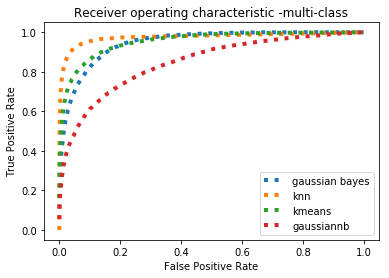

In [159]:
fig,ax=plt.subplots()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic -multi-class')
results.multiclass_roc_curve(y_test,probs_gb,ax,'gaussian bayes')
results.multiclass_roc_curve(y_test,probs_knn,ax,'knn')
results.multiclass_roc_curve(y_test,probs_kmeans,ax,'kmeans')
results.multiclass_roc_curve(y_test,probs_gnb,ax,'gaussiannb')
ax.legend(loc="lower right")

In [160]:
fig.savefig('rocmnist')

# MEDICAL DATA

In [75]:
data = pd.read_csv('Medical_data.csv')
X = data.as_matrix()
print(X)
y=np.empty(X.shape[0])
for i in range(X.shape[0]):
    if(X[i,0]=='HEALTHY'):
        y[i]=0
    if(X[i,0]=='SURGERY'):
        y[i]=1
    if(X[i,0]=='MEDICATION'):
        y[i]=2
print(y.shape)
X = X[:,1:4]
y=np.array(y,dtype='int')

[['HEALTHY' 1.6315155608144196 -0.26444658130172355 2.534567146651425]
 ['SURGERY' 0.15395105426389907 1.419533481505174 1.3331207912724836]
 ['HEALTHY' 2.021729118164318 0.26204637889999405 2.8799717380508727]
 ...
 ['HEALTHY' 0.19320188275265227 0.36039894430698144 1.8676445668171464]
 ['HEALTHY' 1.6840959730399991 -0.02321819895892971 3.306257682435044]
 ['MEDICATION' 0.9752179047232428 2.305958926888452 0.22982688347681815]]
(3000,)


/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [76]:
data_test = pd.read_csv('test_medical.csv')
X_test = data_test.as_matrix()
# print(X)
y_test=np.empty(X_test.shape[0])
for i in range(X_test.shape[0]):
    if(X_test[i,0]=='HEALTHY'):
        y_test[i]=0
    if(X_test[i,0]=='SURGERY'):
        y_test[i]=1
    if(X_test[i,0]=='MEDICATION'):
        y_test[i]=2
print(y_test.shape)  
X_test = X_test[:,1:4]
y_test=np.array(y_test,dtype='int')

(3000,)


/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [77]:
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=20, test_size=0.2)
# sss.get_n_splits(data, y)
# for train_index, test_index in sss.split(data, y):
#     train, y_train = data[train_index], y[train_index]
#     test, y_test = data[test_index], y[test_index]
train=X
y_train=y
test=X_test
print(y_train)

[0 1 0 ... 0 0 2]


In [78]:
print(train.shape,y_train.shape)

(3000, 3) (3000,)


In [28]:
# n_class=y_train.max()+1
# for j in range(n_class):
#     fig,ax=plt.subplots()
#     for i in range(train.shape[1]):
#         ax.hist(list(train[(y_train==j),i]))
#     fig.savefig('medical_data'+str(j)+'.png')

In [27]:
# x=np.arange(30,32,4)
# acc_tr=[]
# acc=[]
# n_classes=y_train.max()+1
# for i in x:
#     lab=np.zeros(i)
#     kmeans = KMeans(i)
#     preds_tr=kmeans.fit_predict(train)
#     preds, probs_kmeans=kmeans.predict(test)
#     probs_kmeans=np.divide(1,probs_kmeans)
#     probs_kmeans=(probs_kmeans.T/np.sum(probs_kmeans,axis=1)).T
#     probabs_kmeans=np.zeros((test.shape[0],n_classes))
#     for j in range(i):
#         if(y_train[(preds_tr==j)].shape[0]):
#             lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()
#             probabs_kmeans[:,lab[j].astype(int)]+=probs_kmeans[:,j]
#     acc_tr.append(np.sum(y_train==lab[preds_tr.astype(int)])/y_train.shape[0])
#     acc.append(np.sum(y_test==lab[preds.astype(int)])/y_test.shape[0])
    
# print(acc,acc_tr)
# print(probs_kmeans)

In [ ]:
# fig,ax=plt.subplots()
# ax.scatter(list(x),acc_tr)
# ax.scatter(list(x),acc,color='r')
# print(train.shape)

In [26]:
# n_class=y_train.max()+1
# for j in range(n_classes):
#     for i in range(train.shape[1]):
#         plt.hist(list(train[(y_train==j),i]))

In [66]:
i=9
acc_tr=[]
acc=[]
clf=KNN(i)
clf.fit(train,y_train)
preds_tr,_=clf.predict(train)
preds,probs_knn=clf.predict(test)
acc_tr.append(results.accuracy(y_train, preds_tr))
acc.append(results.accuracy(y_test, preds))
print(acc,acc_tr)
print(results.scores(y_test,preds))

[0.895] [0.926]
(0.8985818496089738, 0.895, 0.8957049919320151)


In [74]:

# i=2
# acc_tr=[]
# acc=[]
# clf=GMMNB(i)
# clf.fit(train,y_train)
# preds_tr=clf.predict(train)
# preds=clf.predict(test)
# acc_tr.append(results.accuracy(y_train, preds_tr))
# acc.append(results.accuracy(y_test, preds))
# print(acc,acc_tr)
# print(results.scores(y_test,preds))

In [81]:

# k=50
# acc_tr=[]
# acc=[]
# n_classes=y_train.max()+1
# lab=np.zeros(k)
# kmeans = KMeans(k)
# preds_tr=kmeans.fit_predict(train)
# # preds, probs_kmeans=kmeans.predict(test)
# preds =kmeans.predict(test)
# centers=kmeans.cluster_centers_
# probs_kmeans=np.zeros((test.shape[0],k))

# dist_vec=np.zeros(k)
# for i in range(test.shape[0]):
#                 for j in range(k):
#                     dist_vec[j] = np.sum((test[i,:]-centers[j])**2)
#                 probs_kmeans[i,:]=dist_vec
# probs_kmeans=np.divide(1,probs_kmeans)
# probs_kmeans=(probs_kmeans.T/np.sum(probs_kmeans,axis=1)).T
# probabs_kmeans=np.zeros((test.shape[0],n_classes))
# for j in range(k):
#     if(y_train[(preds_tr==j)].shape[0]):
#         lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()
#         probabs_kmeans[:,lab[j].astype(int)]+=probs_kmeans[:,j]
# acc_tr.append(np.sum(y_train==lab[preds_tr.astype(int)])/y_train.shape[0])
# acc.append(np.sum(y_test==lab[preds.astype(int)])/y_test.shape[0])

# probs_kmeans=probabs_kmeans

In [ ]:
# i=50
# acc_tr=[]
# acc=[]
# n_classes=y_train.max()+1
# lab=np.zeros(i)
# kmeans = KMeans(i)
# preds_tr=kmeans.fit_predict(train)
# preds, probs_kmeans=kmeans.predict(test)
# probs_kmeans=np.divide(1,probs_kmeans)
# probs_kmeans=(probs_kmeans.T/np.sum(probs_kmeans,axis=1)).T
# probabs_kmeans=np.zeros((test.shape[0],n_classes))
# for j in range(i):
#     if(y_train[(preds_tr==j)].shape[0]):
#         lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()
#         probabs_kmeans[:,lab[j].astype(int)]+=probs_kmeans[:,j]
# acc_tr.append(np.sum(y_train==lab[preds_tr.astype(int)])/y_train.shape[0])
# acc.append(np.sum(y_test==lab[preds.astype(int)])/y_test.shape[0])

# probs_kmeans=probabs_kmeans

In [80]:
print(acc,acc_tr)
print(results.scores(y_test,lab[preds.astype(int)]))

[0.8746666666666667] [0.884]
(0.8874859285627358, 0.8746666666666666, 0.8757012767275888)


In [74]:
clf = GaussianNB()
clf.fit(train,y_train)
preds_tr, probs_tr_gnb=clf.predict(train)
preds, probs_gnb=clf.predict(test)
acc_tr=np.sum(y_train==preds_tr)/y_train.shape
acc=np.sum(y_test==preds)/y_test.shape
print(acc,acc_tr)
print(results.scores(y_test,preds))

[0.89866667] [0.90666667]
(0.9003003023566966, 0.8986666666666667, 0.8990564264733582)


In [76]:
clf = GaussianBayes()
clf.fit(train,y_train)
preds_tr, probs_tr_gb=clf.predict(train)
preds, probs_gb=clf.predict(test)
acc_tr=np.sum(y_train==preds_tr)/y_train.shape
acc=np.sum(y_test==preds)/y_test.shape
print(acc,acc_tr)
print(results.scores(y_test,preds))

[0.89766667] [0.90333333]
(0.8995270941804185, 0.8976666666666667, 0.8981247958615769)


In [91]:
for i in range(len(probs_knn)):
    while(probs_knn[i].shape[0]<3):
        probs_knn[i]=np.append(probs_knn[i],[0.00])

probs_knn=np.asarray(probs_knn)

3
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [0 0 1]]
(3000, 3) (3000, 3)
3
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [0 0 1]]
(3000, 3) (3000, 3)
3
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [0 0 1]]
(3000, 3) (3000, 3)
3
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [0 0 1]]
(3000, 3) (3000, 3)


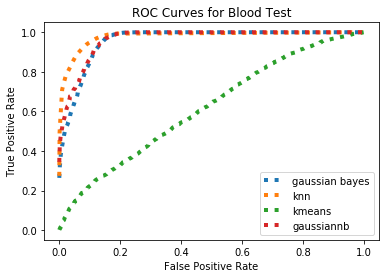

In [93]:
fig,ax=plt.subplots()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves for Blood Test')
results.multiclass_roc_curve(y_test,probs_gb,ax,'gaussian bayes')
results.multiclass_roc_curve(y_test,np.asarray(probs_knn),ax,'knn')
results.multiclass_roc_curve(y_test,probs_kmeans,ax,'kmeans')
results.multiclass_roc_curve(y_test,probs_gnb,ax,'gaussiannb')
ax.legend(loc="lower right")

In [94]:
fig.savefig('rocmedical')

# TRAIN SELECTION DATA

In [7]:
data = pd.read_csv('railwayBookingList.csv')

NameError: name 'pd' is not defined

In [8]:
print(data.head())

NameError: name 'data' is not defined

In [9]:

dict_class={'FIRST_AC':0,'SECOND_AC':1,'THIRD_AC':2,'NO_PREF':3}
for i in range(data.shape[0]):
    data['preferredClass'][i]=dict_class[data['preferredClass'][i]]
    

NameError: name 'data' is not defined

In [40]:
data['sex'][(data['sex']=='male')]=0
data['sex'][(data['sex']=='female')]=1

/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [41]:
sorted_b=np.sort(np.array(data['budget'].unique()))
for x,i in enumerate(sorted_b):
        data['budget'][data['budget']==i]=x

/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [42]:
data.head()

,caseID,boarded,budget,memberCount,preferredClass,sex,age
0,111131089,0,17,0,0,1,2
1,2489059216,0,15,3,0,0,0
2,1565109576,1,15,3,0,1,0
3,1373075087,1,15,3,0,0,3
4,1598041082,1,15,3,0,1,2


In [43]:
y=data['boarded']
X = data.as_matrix()
X=X[:-1,2:]
y=y[:-1]
y=np.array(y)
print(X.shape)

(1309, 5)


/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [44]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    train, y_train = X[train_index], y[train_index]
    test, y_test = X[test_index], y[test_index]

In [45]:
y_train=np.array(y_train)
train=np.array(train)
test=np.array(test)
y_test=np.array(y_test)


In [25]:
# x=np.arange(3,300,4)
# acc_tr=[]
# acc=[]
# for i in x:
#     lab=np.zeros(i)
#     kmeans = KMeans(i)
#     preds_tr=kmeans.fit_predict(train)
#     preds=kmeans.predict(test)
# #     print(preds_tr)
#     for j in range(i):
#         lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()  
#     acc_tr.append(np.sum(y_train==lab[preds_tr])/y_train.shape)
#     acc.append(np.sum(y_test==lab[preds])/y_test.shape)

In [24]:
# fig,ax=plt.subplots()
# ax.scatter(list(x),acc_tr,label='Train Accuracy')
# ax.scatter(list(x),acc,color='r',label='Validation Accuracy')
# ax.legend(loc='lower right')
# print(train.shape)
# fig.savefig('kmeanstrs.png')

In [22]:
# acc_tr=[]
# acc=[]
# x=np.arange(1,10)
# for i in x:
#     clf=KNN(i)
#     clf.fit(train,y_train)
#     preds_tr=clf.predict(train)
#     preds=clf.predict(test)
#     acc_tr.append(results.accuracy(y_train, preds_tr))
#     acc.append(results.accuracy(y_test, preds))
# # print(acc_tr,acc_tr2)
# print(acc,acc2)

In [23]:
# fig,ax=plt.subplots()
# ax.scatter(list(x),acc_tr,label='Train Accuracy')
# ax.scatter(list(x),acc,color='r',label='Validation Accuracy')
# ax.legend(loc='upper right')
# # fig.savefig('knntrs.png')

In [21]:
# n_class=y_train.max()+1
# for j in range(n_class):
#     fig,ax=plt.subplots()
#     for i in range(train.shape[1]):
#         ax.hist(list(train[(y_train==j),i]))
#     fig.savefig('train_selection_class_cond'+str(j)+'.png')

In [105]:
i=7
acc_tr=[]
acc=[]
clf=KNN(i)
clf.fit(train,y_train)
preds_tr,_=clf.predict(train)
preds,probs_knn=clf.predict(test)
acc_tr.append(results.accuracy(y_train, preds_tr))
acc.append(results.accuracy(y_test, preds))
print(acc,acc_tr)
print(results.scores(y_test,np.asarray(preds)))

[0.7748091603053435] [0.8127984718242598]
(0.7620863536085724, 0.7566666666666667, 0.7590522952225081)


In [48]:
# k=300
# acc_tr=[]
# acc=[]
# n_classes=y_train.max()+1
# lab=np.zeros(k)
# kmeans = KMeans(k)
# preds_tr=kmeans.fit_predict(train)
# # preds, probs_kmeans=kmeans.predict(test)
# preds =kmeans.predict(test)
# centers=kmeans.cluster_centers_
# probs_kmeans=np.zeros((test.shape[0],k))

# dist_vec=np.zeros(k)
# for i in range(test.shape[0]):
#                 for j in range(k):
#                     dist_vec[j] = np.sum((test[i,:]-centers[j])**2)
#                 probs_kmeans[i,:]=dist_vec
# probs_kmeans=np.divide(1,probs_kmeans)
# probs_kmeans=(probs_kmeans.T/np.sum(probs_kmeans,axis=1)).T
# probabs_kmeans=np.zeros((test.shape[0],n_classes))
# for j in range(k):
#     if(y_train[(preds_tr==j)].shape[0]):
#         lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()
#         probabs_kmeans[:,lab[j].astype(int)]+=probs_kmeans[:,j]
# acc_tr.append(np.sum(y_train==lab[preds_tr.astype(int)])/y_train.shape[0])
# acc.append(np.sum(y_test==lab[preds.astype(int)])/y_test.shape[0])

# probs_kmeans=probabs_kmeans

/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide


In [10]:
# i=300
# acc_tr=[]
# acc=[]
# n_classes=y_train.max()+1
# lab=np.zeros(i)
# kmeans = KMeans(i)
# preds_tr=kmeans.fit_predict(train)
# preds, probs_kmeans=kmeans.predict(test)
# probs_kmeans=np.divide(1,probs_kmeans)
# probs_kmeans=(probs_kmeans.T/np.sum(probs_kmeans,axis=1)).T
# probabs_kmeans=np.zeros((test.shape[0],n_classes))
# for j in range(i):
#     if(y_train[(preds_tr==j)].shape[0]):
#         lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()
#         probabs_kmeans[:,lab[j].astype(int)]+=probs_kmeans[:,j]
# acc_tr.append(np.sum(y_train==lab[preds_tr.astype(int)])/y_train.shape[0])
# acc.append(np.sum(y_test==lab[preds.astype(int)])/y_test.shape[0])

# probs_kmeans=probabs_kmeans

In [51]:
# print(acc,acc_tr)
# print(results.scores(y_test,preds))

In [110]:
clf = GaussianNB()
clf.fit(train,y_train)
preds_tr, probs_tr_gnb=clf.predict(train)
preds, probs_gnb=clf.predict(test)
acc_tr=np.sum(y_train==preds_tr)/y_train.shape
acc=np.sum(y_test==preds)/y_test.shape
print(acc,acc_tr)
print(results.scores(y_test,preds))

[0.80534351] [0.76408787]
(0.7936473771600763, 0.7947530864197531, 0.7941869599371564)


In [ ]:
clf = Parzen()
clf.fit(train,y_train)
preds_tr, probs_tr_gnb=clf.predict(train)
preds, probs_gnb=clf.predict(test)
acc_tr=np.sum(y_train==preds_tr)/y_train.shape
acc=np.sum(y_test==preds)/y_test.shape
print(acc,acc_tr)
print(results.scores(y_test,preds))

In [112]:
clf = GaussianBayes()
clf.fit(train,y_train)
preds_tr, probs_tr_gb=clf.predict(train)
preds, probs_gb=clf.predict(test)
acc_tr=np.sum(y_train==preds_tr)/y_train.shape
acc=np.sum(y_test==preds)/y_test.shape
print(acc,acc_tr)
print(results.scores(y_test,preds))

[0.80534351] [0.77459408]
(0.7951150330917114, 0.7890123456790124, 0.7917231704465747)


In [58]:
acc_tr=[]
acc=[]
clf=BinomialNB(4)
clf.fit(train[:,1:],y_train)
preds_tr,_=clf.predict(train[:,1:])
preds,probs_bnb=clf.predict(test[:,1:])
acc_tr.append(results.accuracy(y_train, preds_tr))
acc.append(results.accuracy(y_test, preds))
print(acc,acc_tr)
print(results.scores(y_test,preds))

[[0.09625    0.47875    0.6925     0.265625  ]
 [0.08330757 0.75734158 0.16074189 0.2492272 ]]
[0.3816793893129771] [0.38204393505253104]
(0.3816793893129771, 0.808641975308642, 0.5120921505264255)


In [113]:
for i in range(len(probs_knn)):
    while(probs_knn[i].shape[0]<3):
        probs_knn[i]=np.append(probs_knn[i],[0.00])

probs_knn=np.asarray(probs_knn)

(262,) (262, 2)
(262, 2)
(262, 2)
(262, 2)
(262, 2)


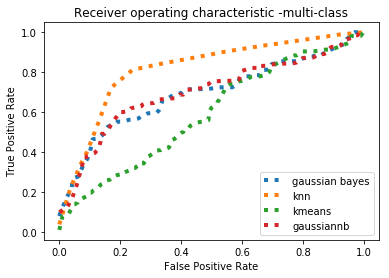

In [137]:
fig,ax=plt.subplots()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic -multi-class')
print(y_test.shape,probs_gb.shape)
results.multiclass_roc_curve(y_test,probs_gb,ax,'gaussian bayes')
results.multiclass_roc_curve(y_test,probs_knn,ax,'knn')
results.multiclass_roc_curve(y_test,probs_kmeans,ax,'kmeans')
results.multiclass_roc_curve(y_test,probs_gnb,ax,'gaussiannb')
# # results.multiclass_roc_curve(y_test,probs_bnb,ax,'binomial plus gaussian')
ax.legend(loc="lower right")

In [138]:
fig.savefig('roctrs')

# FINAL RESULTS

|Dataset| Classifier  |   Parameter | Accuracy |Precision | Recall | F1-score |
|--------|:-------:|-----|-------|------|-------|-------|
|Medical Data|KNeighbours|9| 89.5| 89.85|89.5| 89.57| 
|Medical Data|Gaussian Bayes|-|89.76 |89.95 |89.76| 89.81| 
|Medical Data|Gaussian Mixture Model Naive Bayes|2| 89.86| 90.00|89.86| 89.90| 
|Medical Data|Gaussian NB|-| 89.86| 90.00|89.86| 89.90|  
|Medical Data|KMeans|50| 86.93| 87.91|86.93| 86.95| 
|Medical Data|Parzen Window|| 90.1| 89.6|89.7| 89.3| 
|Train Selection Data|KNeighbours|7| 77.48| 76.20|75.66| 75.90| 
|Train Selection Data|Gaussian Bayes|-| 80.53|79.51 |78.9|79.17 | 
|Train Selection Data|Gaussian NB|-| 80.53|79.36 |79.47|79.41 | 
|Train Selection Data|Bionomial NB||38.16 | 381.6|80.86| 51.2| 
|Train Selection Data|KMeans|300| 71.75| 71.87 | 71.75| 71.46| 
|Train Selection Data|KMeans|300| 71.75| 71.87 | 71.75| 71.46| 
|Train Selection Data|Parzen Window|| 75.1|74.7|74.9| 74.85| 
|Fashion-MNIST|KNeighbours|9| 85.3|85.336 |85.3| 85.24| 
|Fashion-MNIST|Gaussian Bayes|-| 79.85|80.16 |79.85| 79.29| 
|Fashion-MNIST|Gaussian NB|-|75.91 |76 |75.9| 75.86| 
|Fashion-MNIST|KMeans|150| 75.16|74.82 |75.16| 74.73|
|Fashion-MNIST|KMeans|150| 75.16|74.82 |75.16| 74.73|